In [142]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import davies_bouldin_score
from fcmeans import FCM
from scipy.cluster.hierarchy import dendrogram,linkage
import openpyxl
from sklearn.preprocessing import OneHotEncoder
import skfuzzy as fuzz

In [143]:
df = pd.read_excel('D:\Kuliah\Semester 4\Machine Learning\Dataset_UAS\data.jabarprov.go.id\disdukcapil_2-od_16998_jml_penduduk_penyandang_disabilitas__kategori_disa_v2_data.xlsx', sheet_name='data')
df.head()

id  kode_provinsi nama_provinsi  kode_kabupaten_kota nama_kabupaten_kota  \
0   1             32    JAWA BARAT                 3201     KABUPATEN BOGOR   
1   2             32    JAWA BARAT                 3201     KABUPATEN BOGOR   
2   3             32    JAWA BARAT                 3201     KABUPATEN BOGOR   
3   4             32    JAWA BARAT                 3201     KABUPATEN BOGOR   
4   5             32    JAWA BARAT                 3201     KABUPATEN BOGOR   

           kategori_disabilitas  jumlah_penduduk satuan  tahun  
0             DISABILITAS FISIK              634   JIWA   2013  
1        DISABILITAS NETRA/BUTA              203   JIWA   2013  
2      DISABILITAS RUNGU/WICARA              229   JIWA   2013  
3       DISABILITAS MENTAL/JIWA              215   JIWA   2013  
4  DISABILITAS FISIK DAN MENTAL              106   JIWA   2013

In [144]:
shape= df.shape
shape

(1458, 9)

In [145]:
df2 = df.drop(['id', 'nama_provinsi', 'kode_provinsi', 'kode_kabupaten_kota', 'satuan'], axis=1)
df2.head()

nama_kabupaten_kota          kategori_disabilitas  jumlah_penduduk  tahun
0     KABUPATEN BOGOR             DISABILITAS FISIK              634   2013
1     KABUPATEN BOGOR        DISABILITAS NETRA/BUTA              203   2013
2     KABUPATEN BOGOR      DISABILITAS RUNGU/WICARA              229   2013
3     KABUPATEN BOGOR       DISABILITAS MENTAL/JIWA              215   2013
4     KABUPATEN BOGOR  DISABILITAS FISIK DAN MENTAL              106   2013

In [146]:
df2['kategori_disabilitas'] = 'DISABILITAS'
df2 = df2.groupby(['nama_kabupaten_kota', 'kategori_disabilitas', 'tahun'])['jumlah_penduduk'].sum().reset_index()
df2.head()

nama_kabupaten_kota kategori_disabilitas  tahun  jumlah_penduduk
0   KABUPATEN BANDUNG          DISABILITAS   2013             2843
1   KABUPATEN BANDUNG          DISABILITAS   2014             2301
2   KABUPATEN BANDUNG          DISABILITAS   2015             1871
3   KABUPATEN BANDUNG          DISABILITAS   2016             1832
4   KABUPATEN BANDUNG          DISABILITAS   2017             1779

In [147]:
scaler = MinMaxScaler()
df2[['jumlah_penduduk_scaled', 'tahun_scaled']] = scaler.fit_transform(df2[['jumlah_penduduk', 'tahun']])
df2.head()

nama_kabupaten_kota kategori_disabilitas  tahun  jumlah_penduduk  \
0   KABUPATEN BANDUNG          DISABILITAS   2013             2843   
1   KABUPATEN BANDUNG          DISABILITAS   2014             2301   
2   KABUPATEN BANDUNG          DISABILITAS   2015             1871   
3   KABUPATEN BANDUNG          DISABILITAS   2016             1832   
4   KABUPATEN BANDUNG          DISABILITAS   2017             1779   

   jumlah_penduduk_scaled  tahun_scaled  
0                0.158818           0.0  
1                0.128540           0.1  
2                0.104519           0.2  
3                0.102341           0.3  
4                0.099380           0.4

c:\Users\Laurent Wise\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Laurent Wise\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


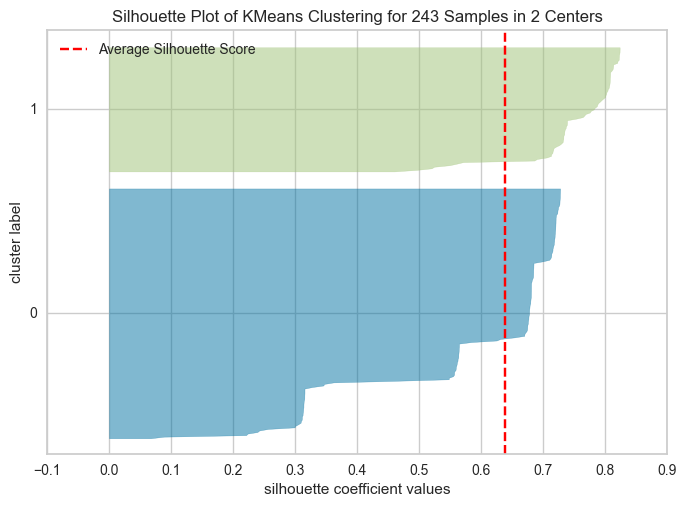

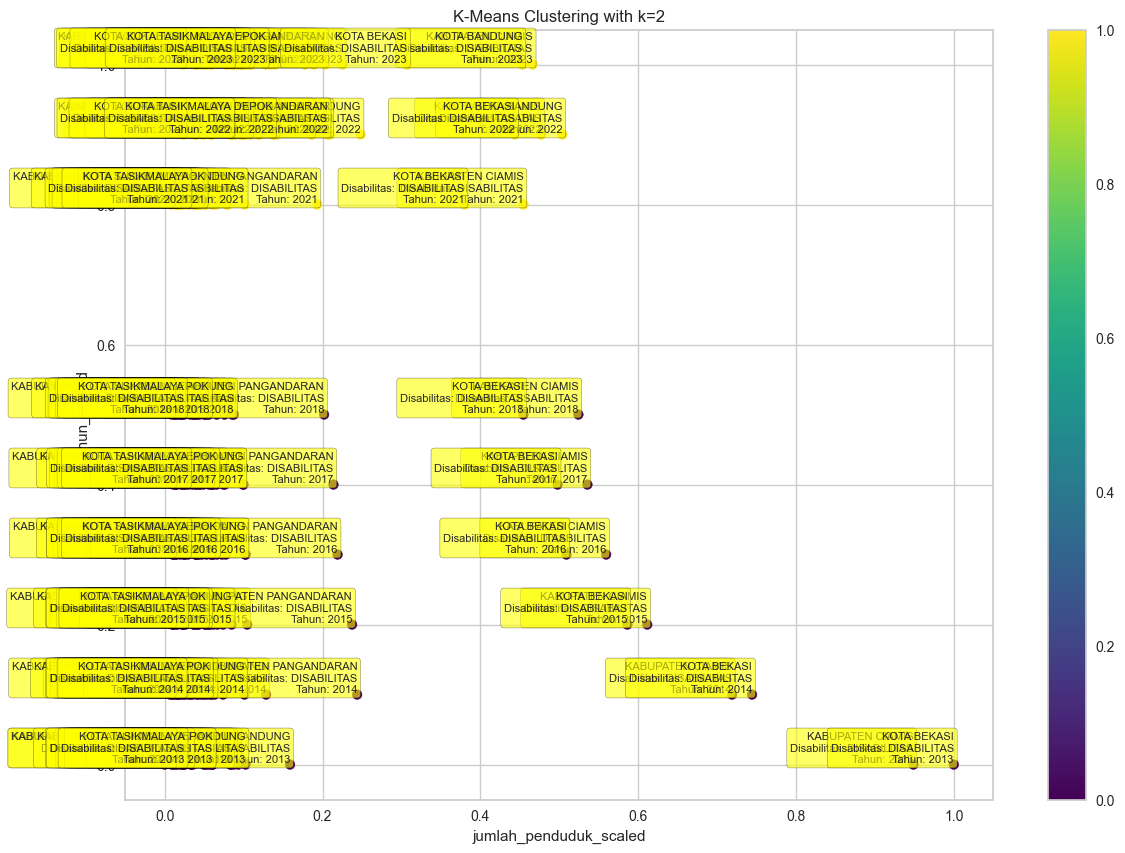

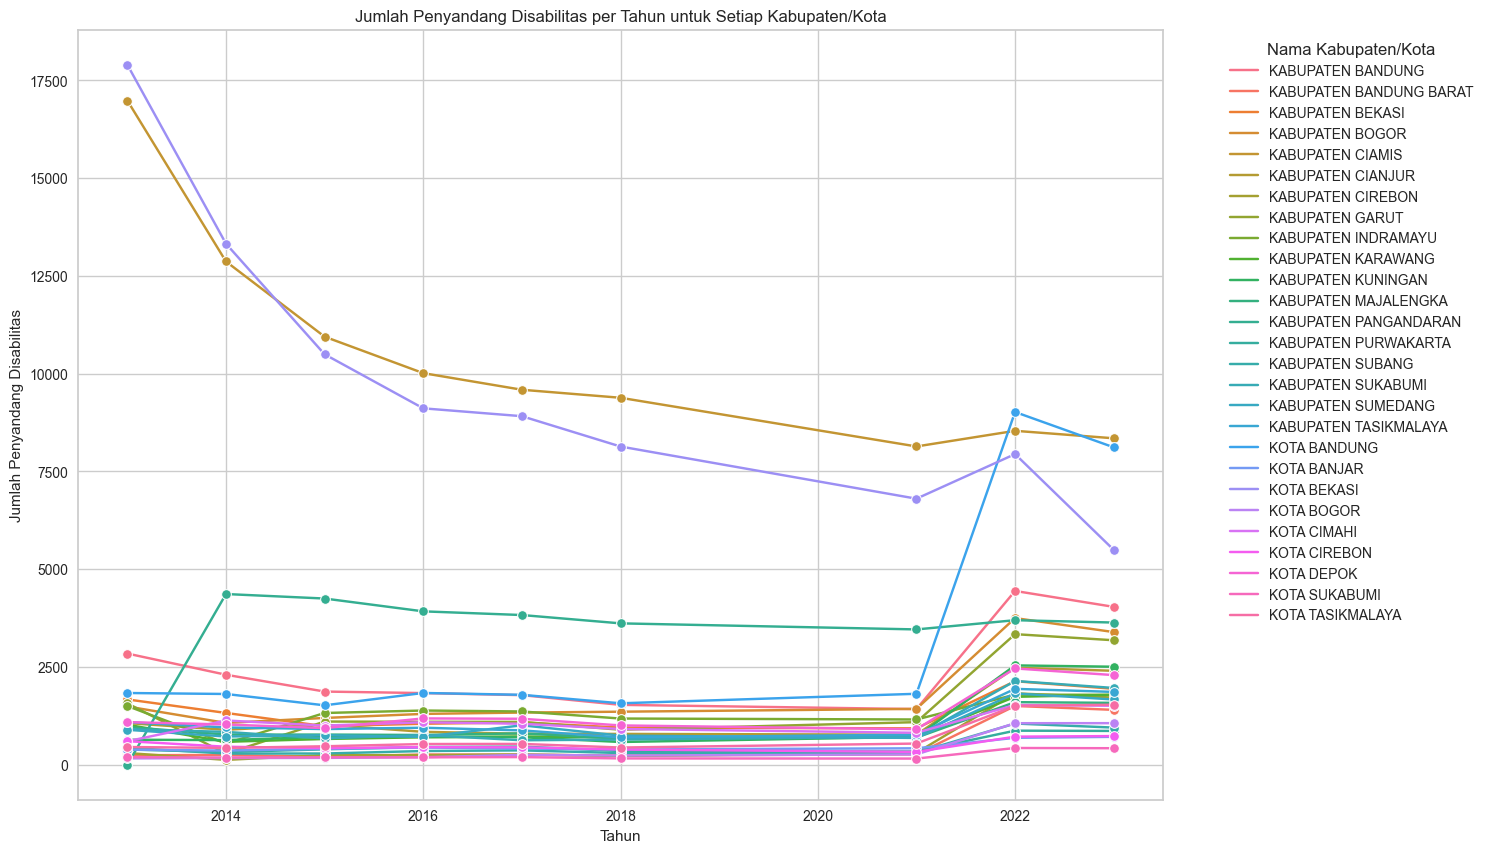

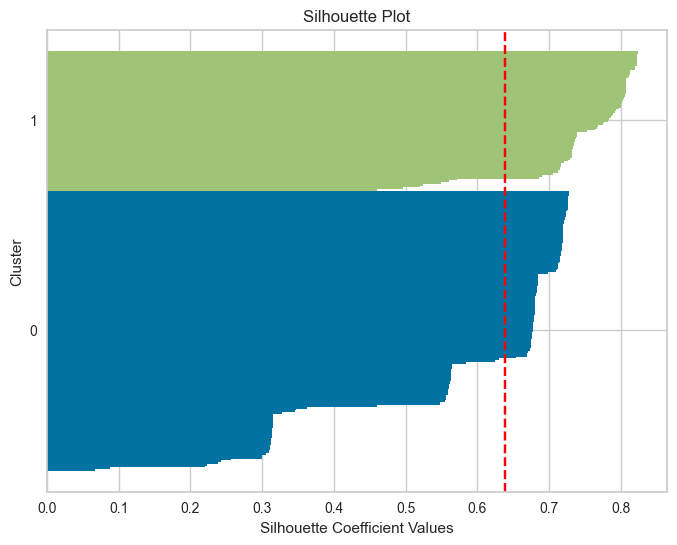

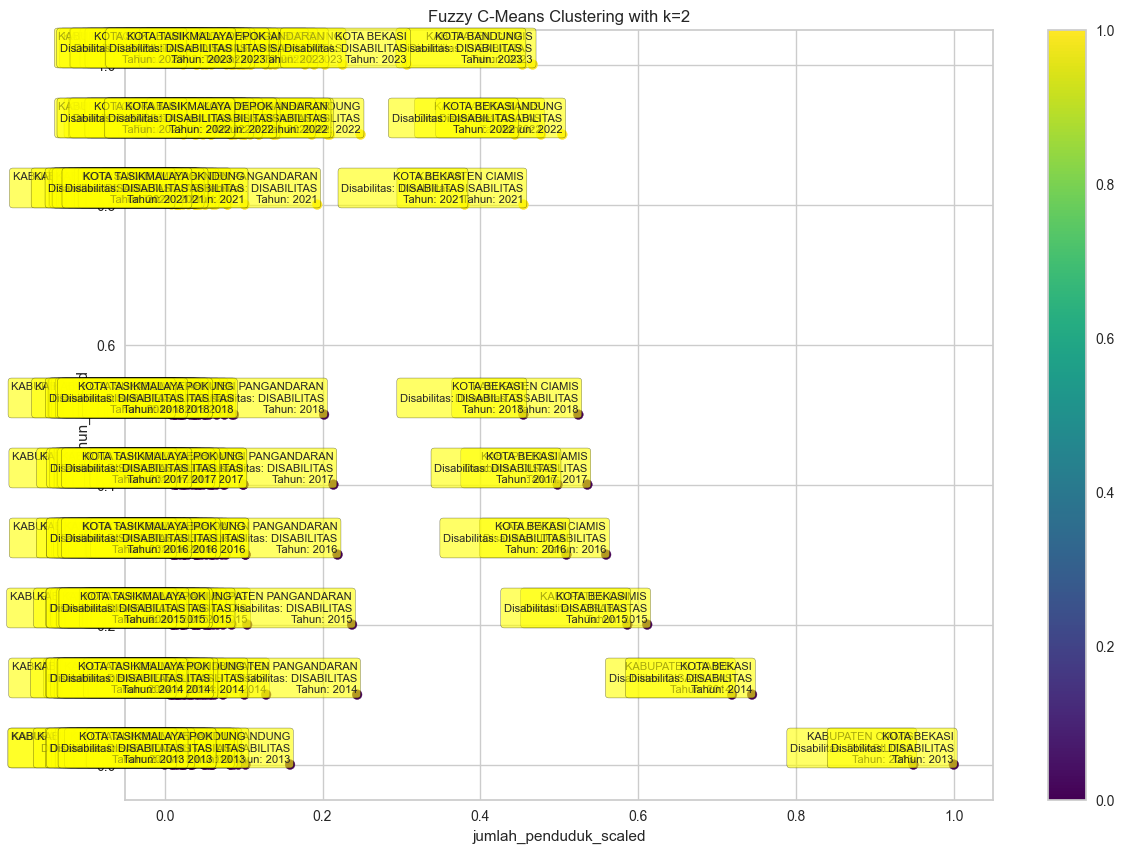

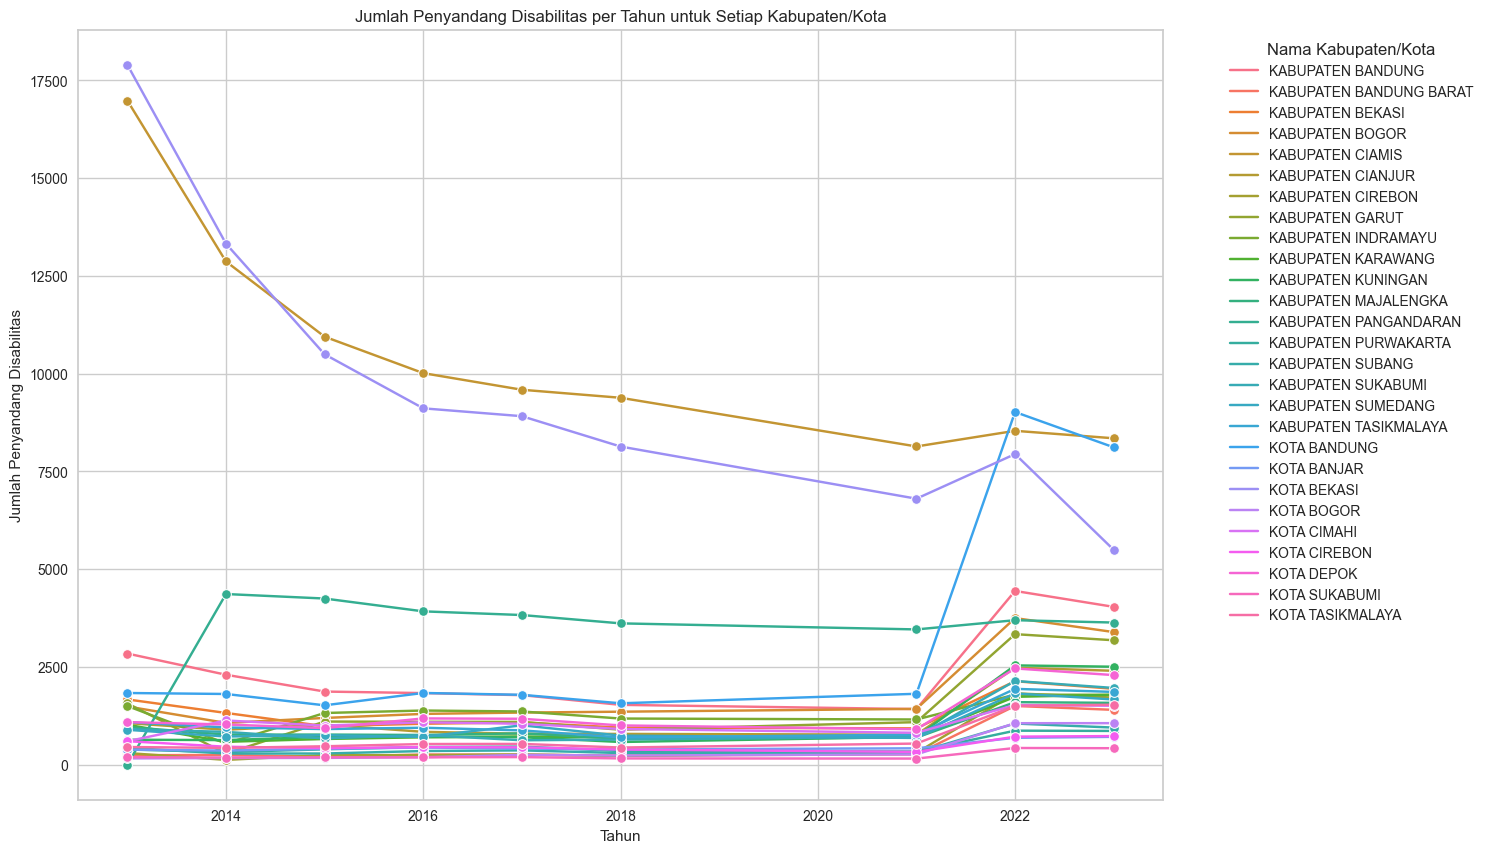

c:\Users\Laurent Wise\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Laurent Wise\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


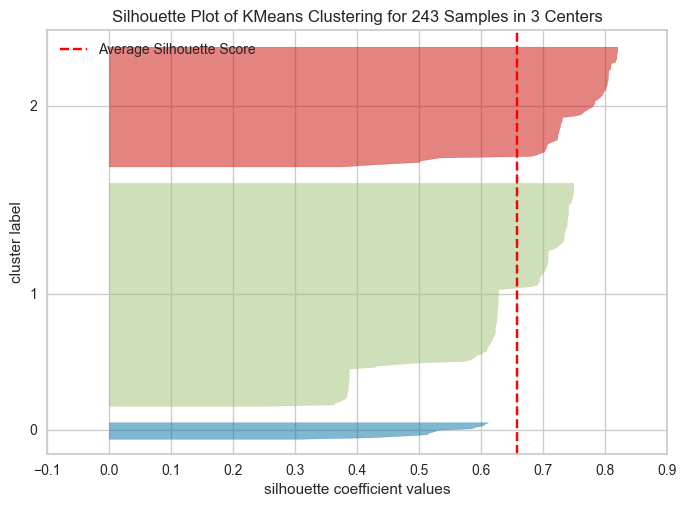

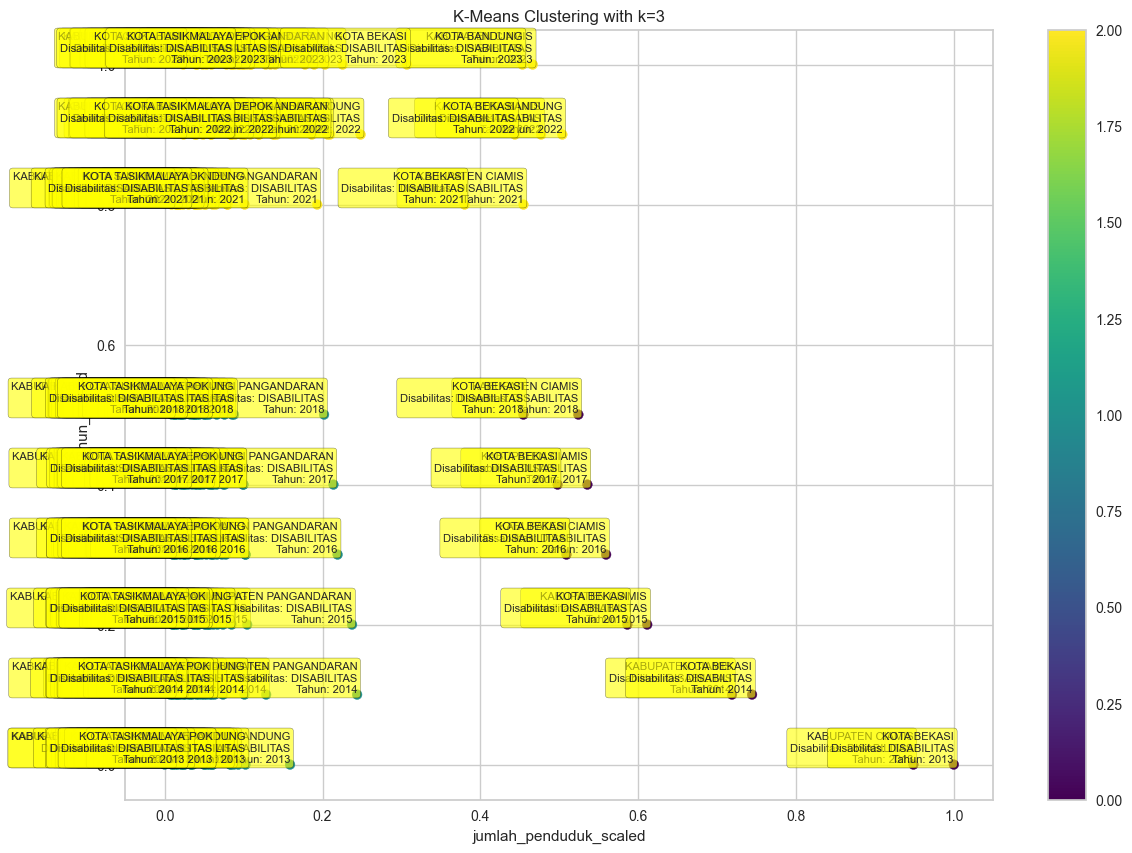

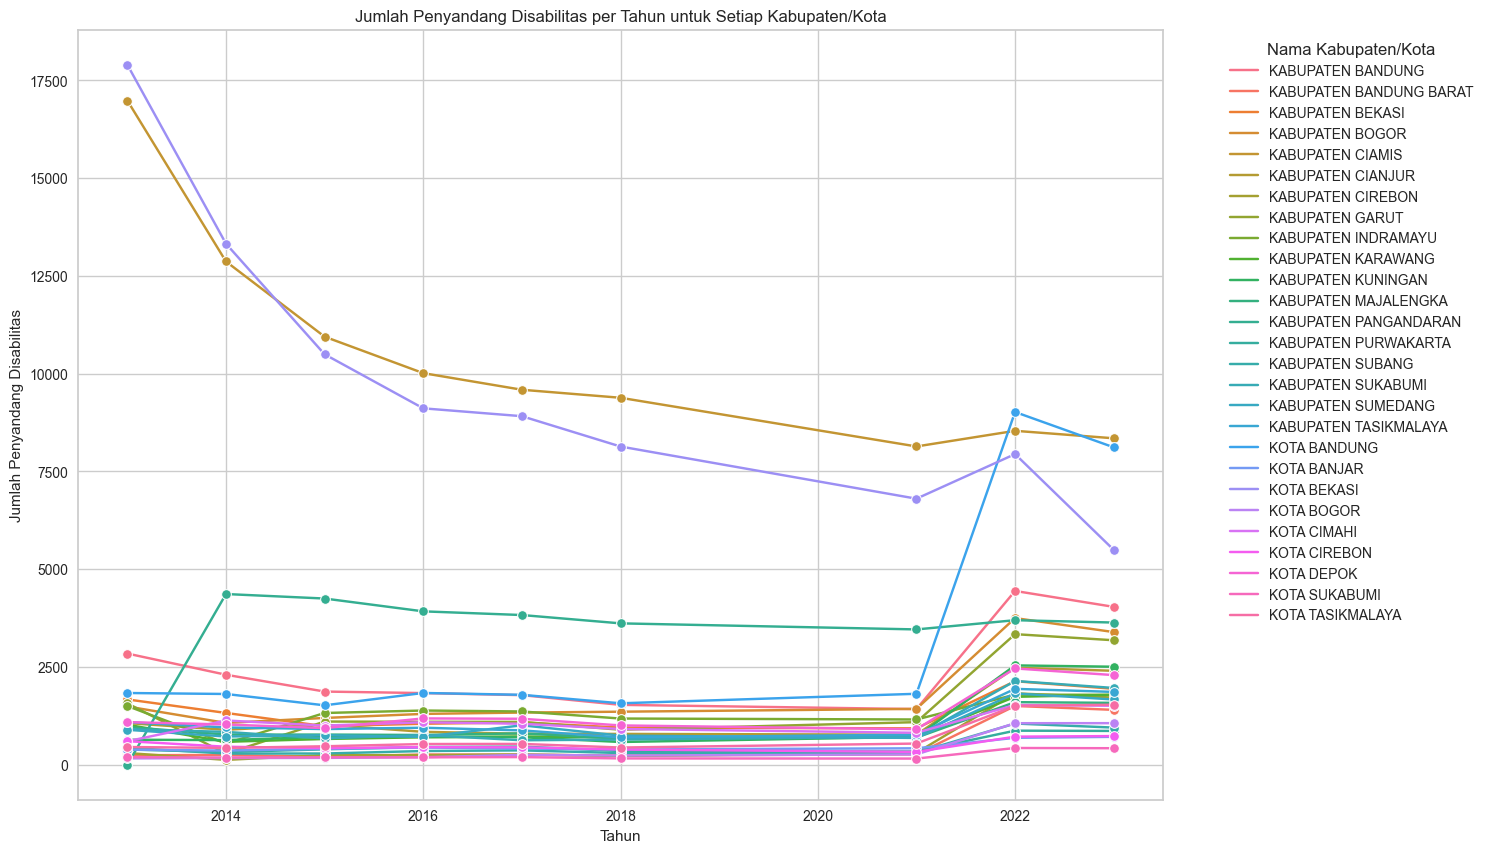

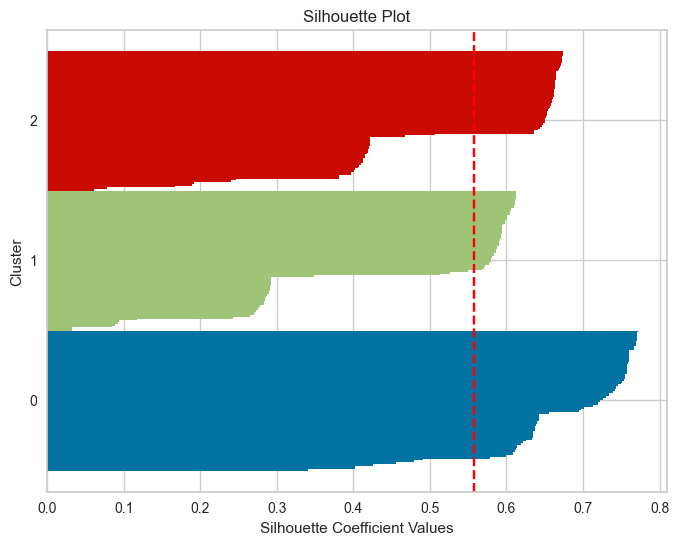

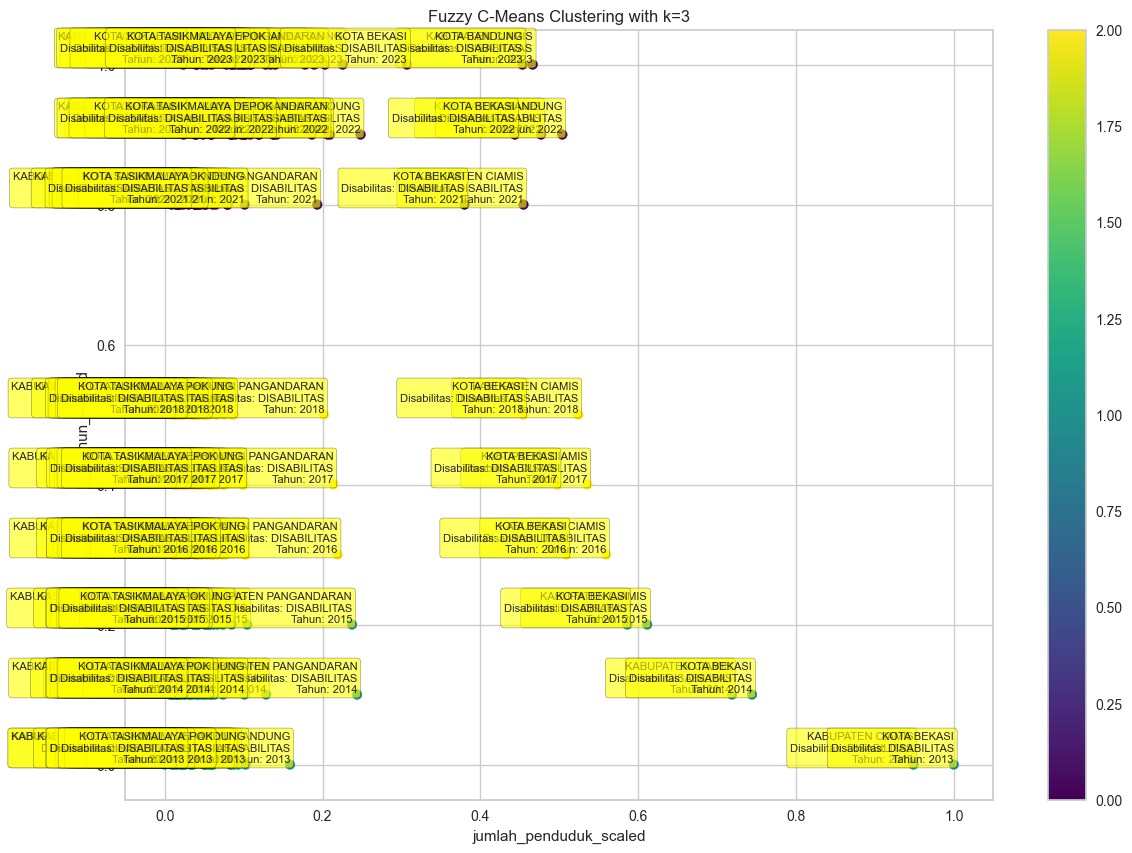

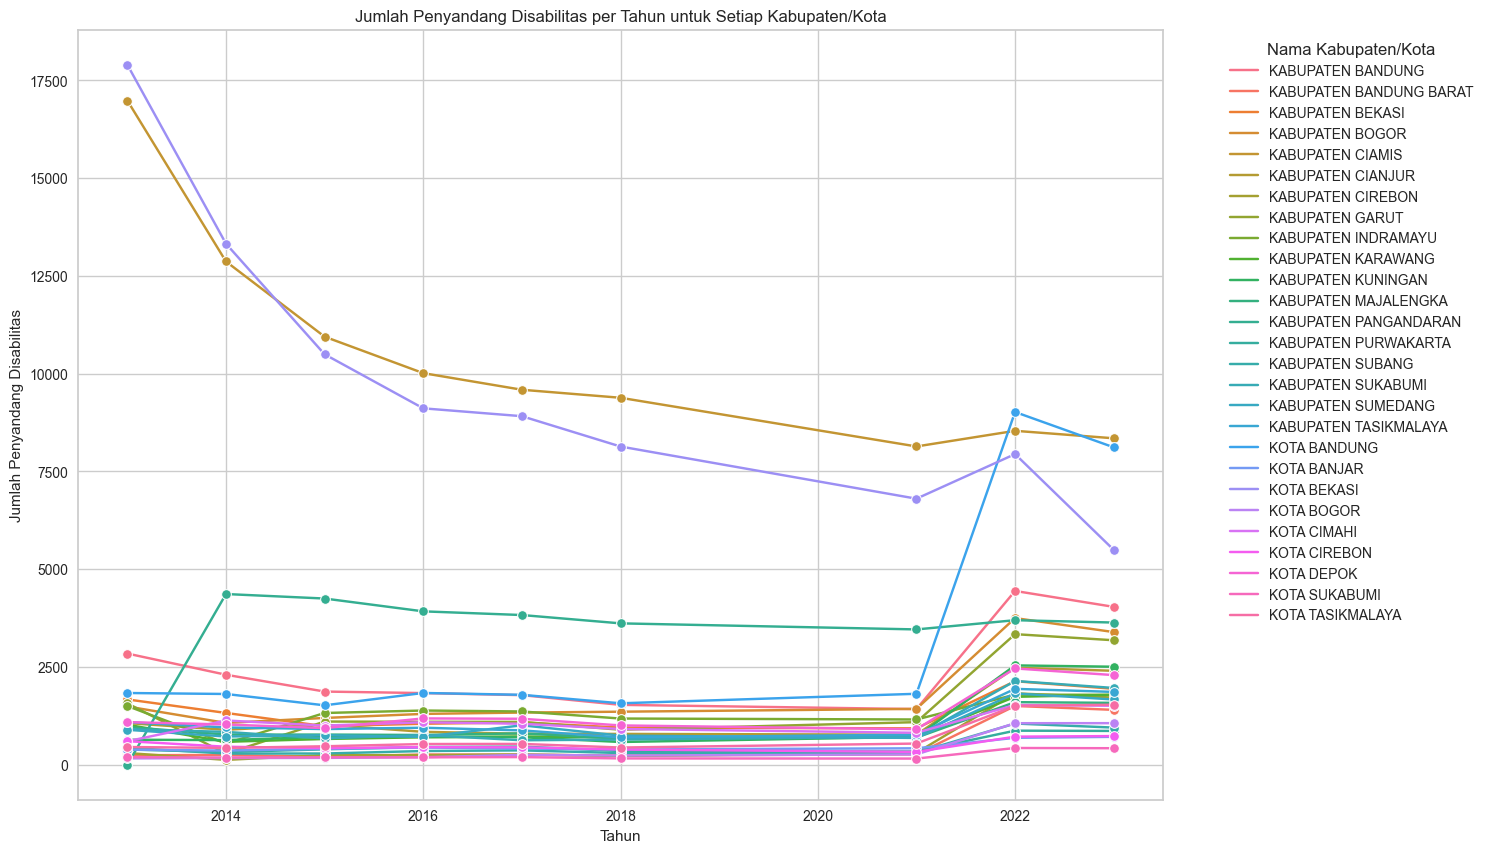

c:\Users\Laurent Wise\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Laurent Wise\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


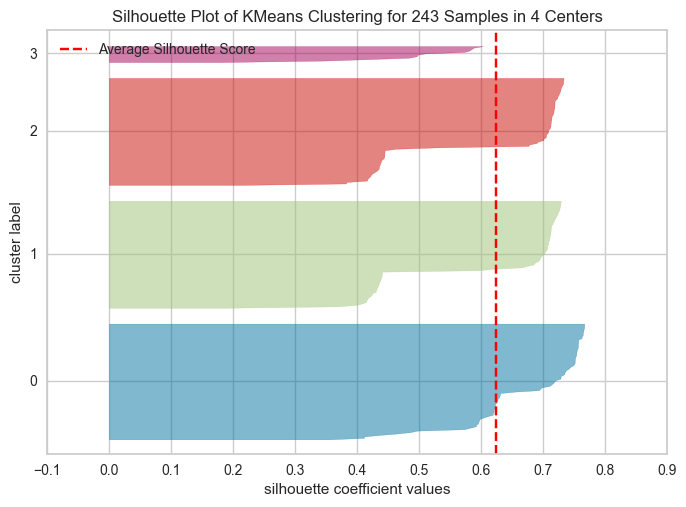

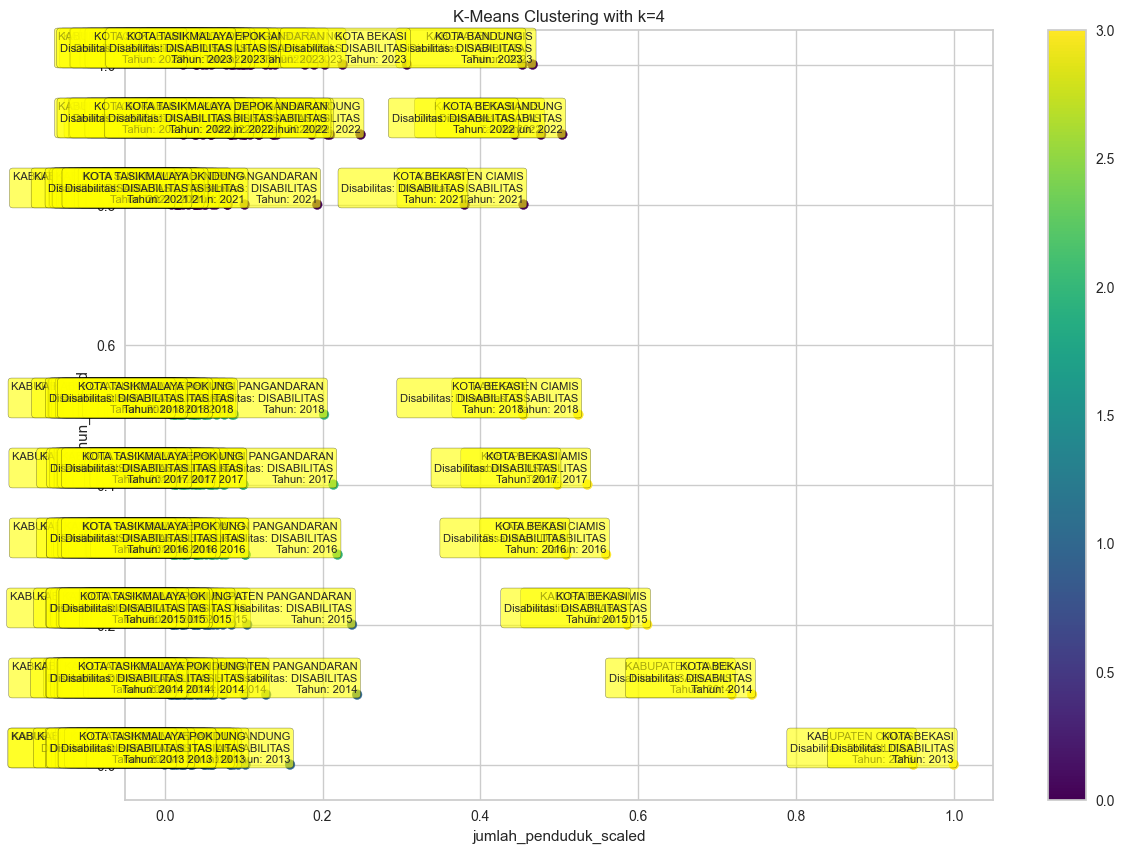

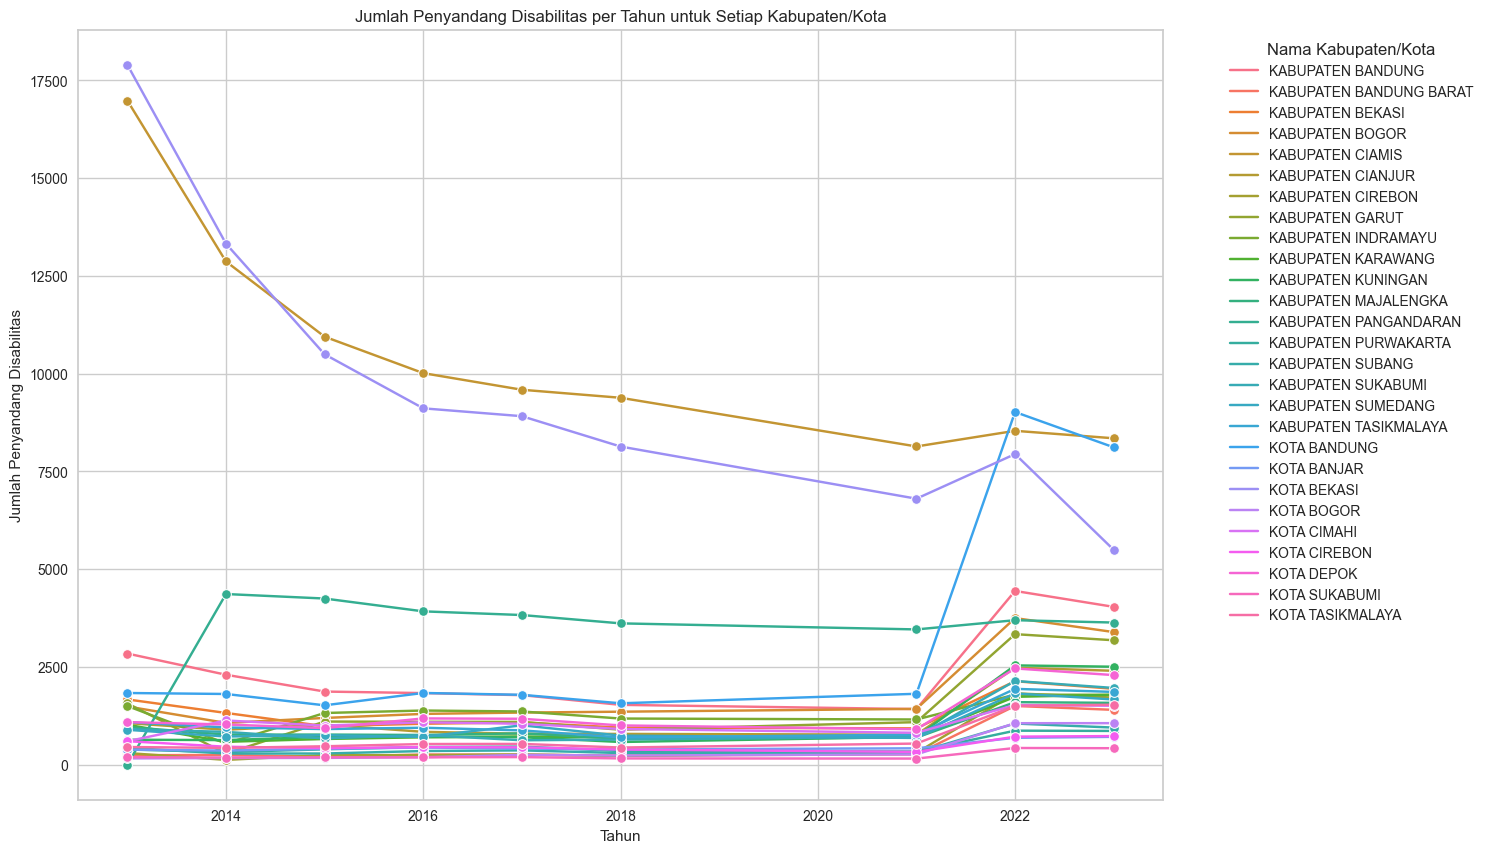

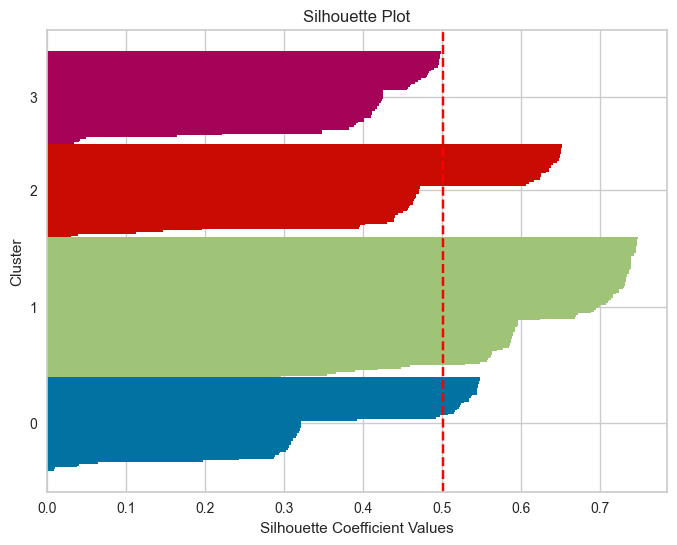

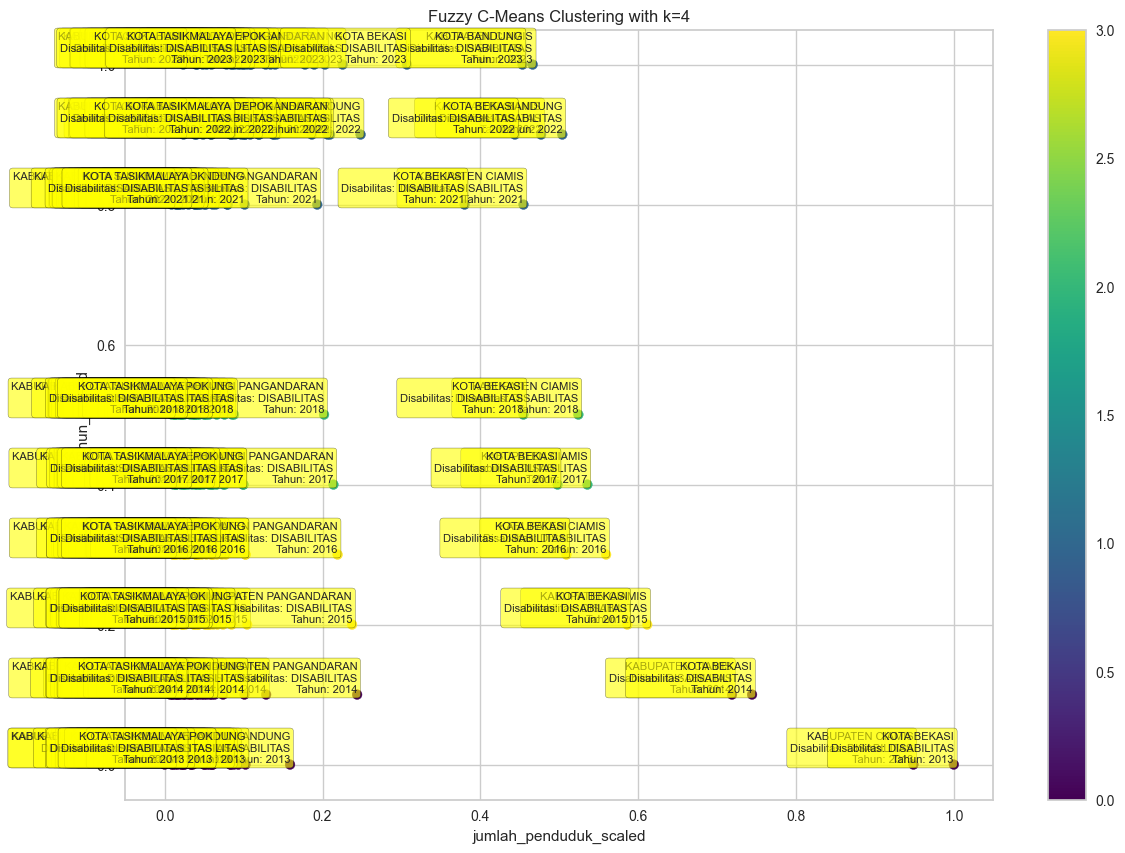

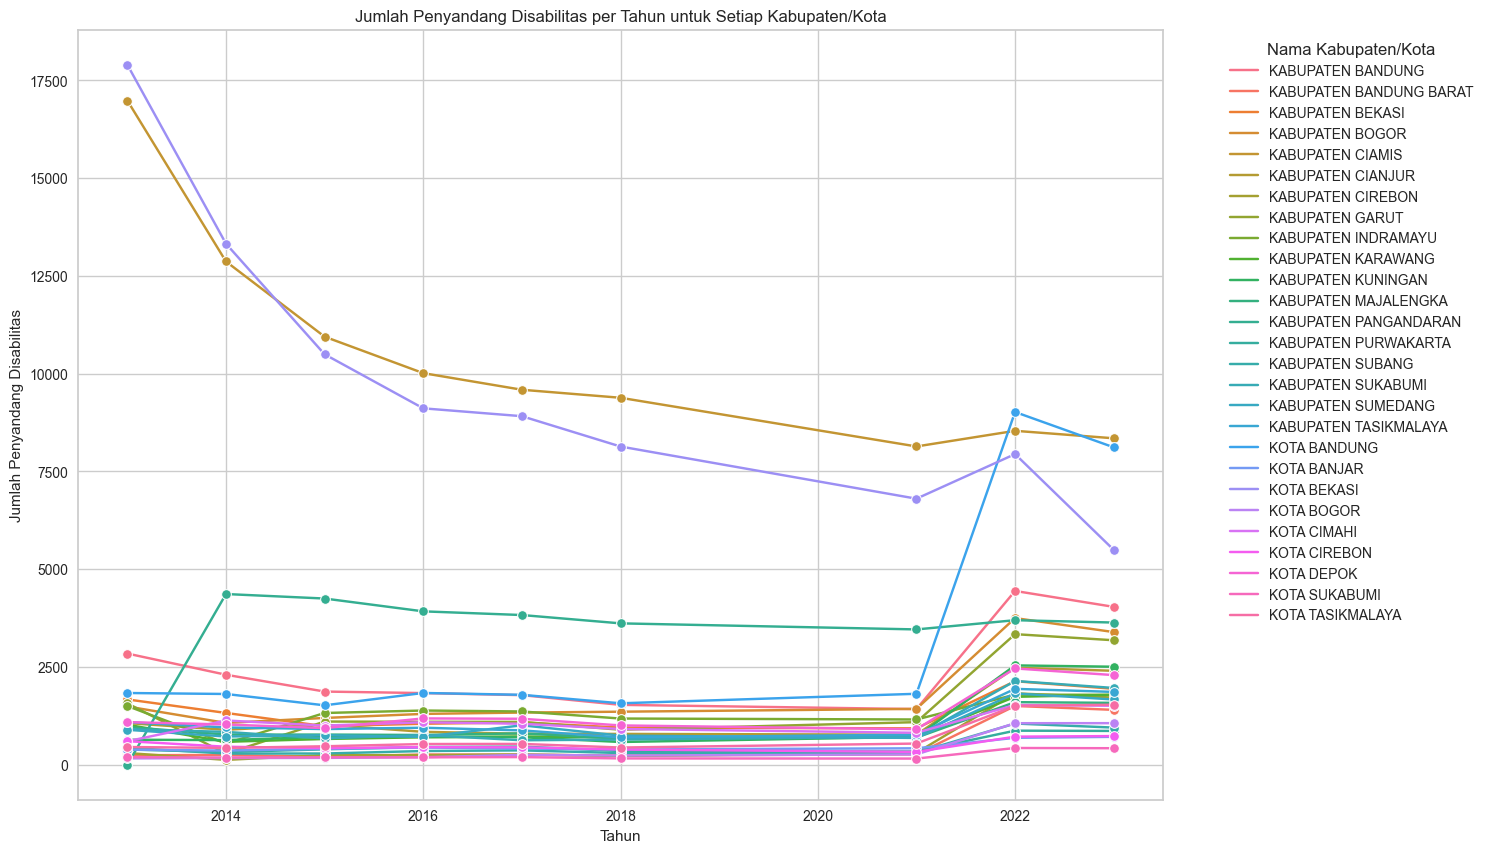

c:\Users\Laurent Wise\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Laurent Wise\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


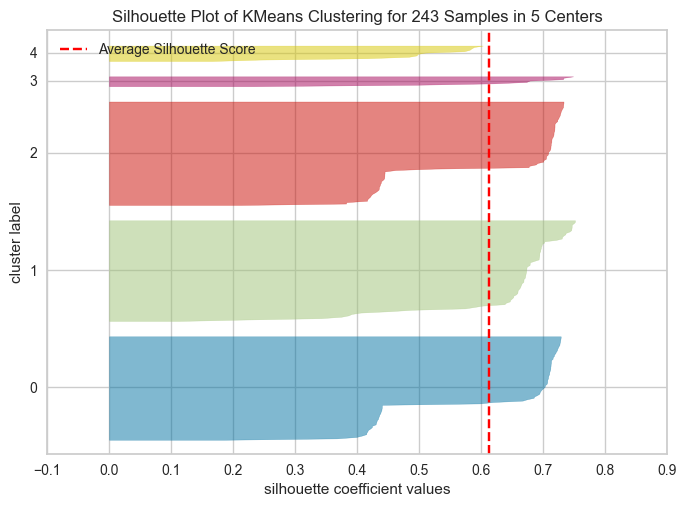

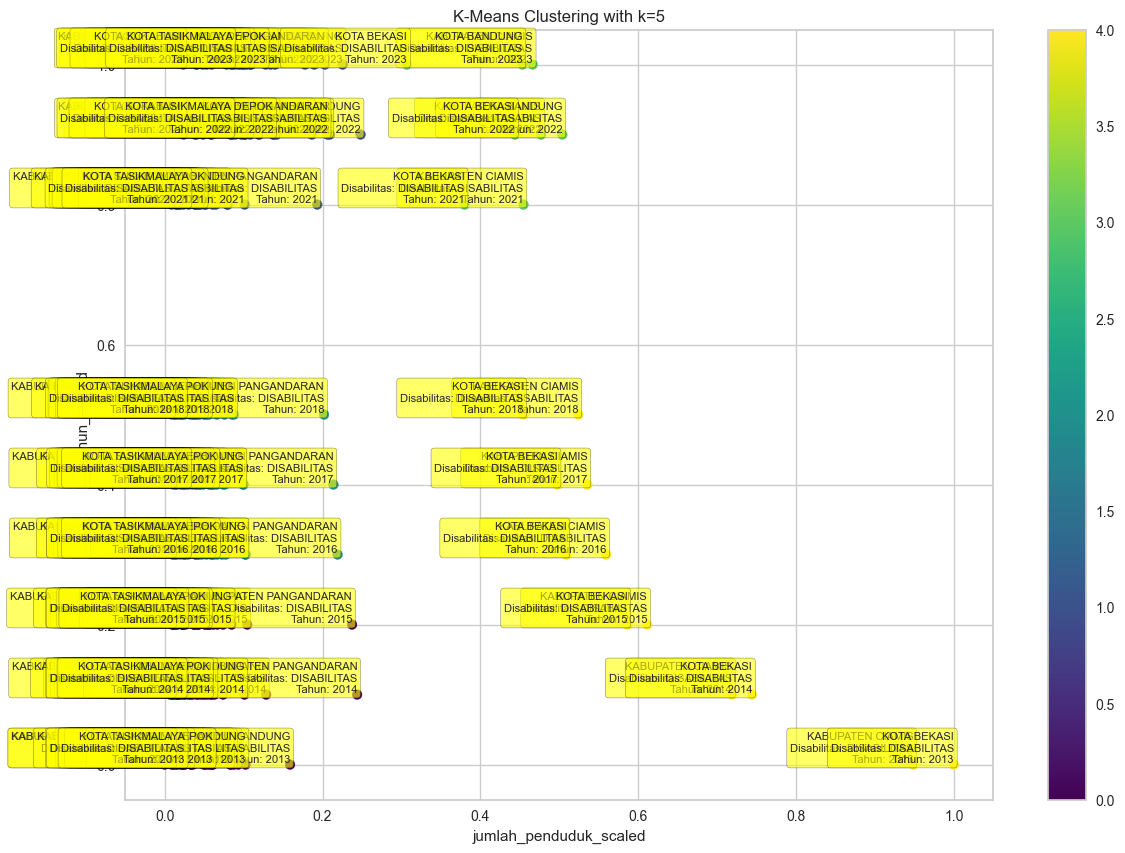

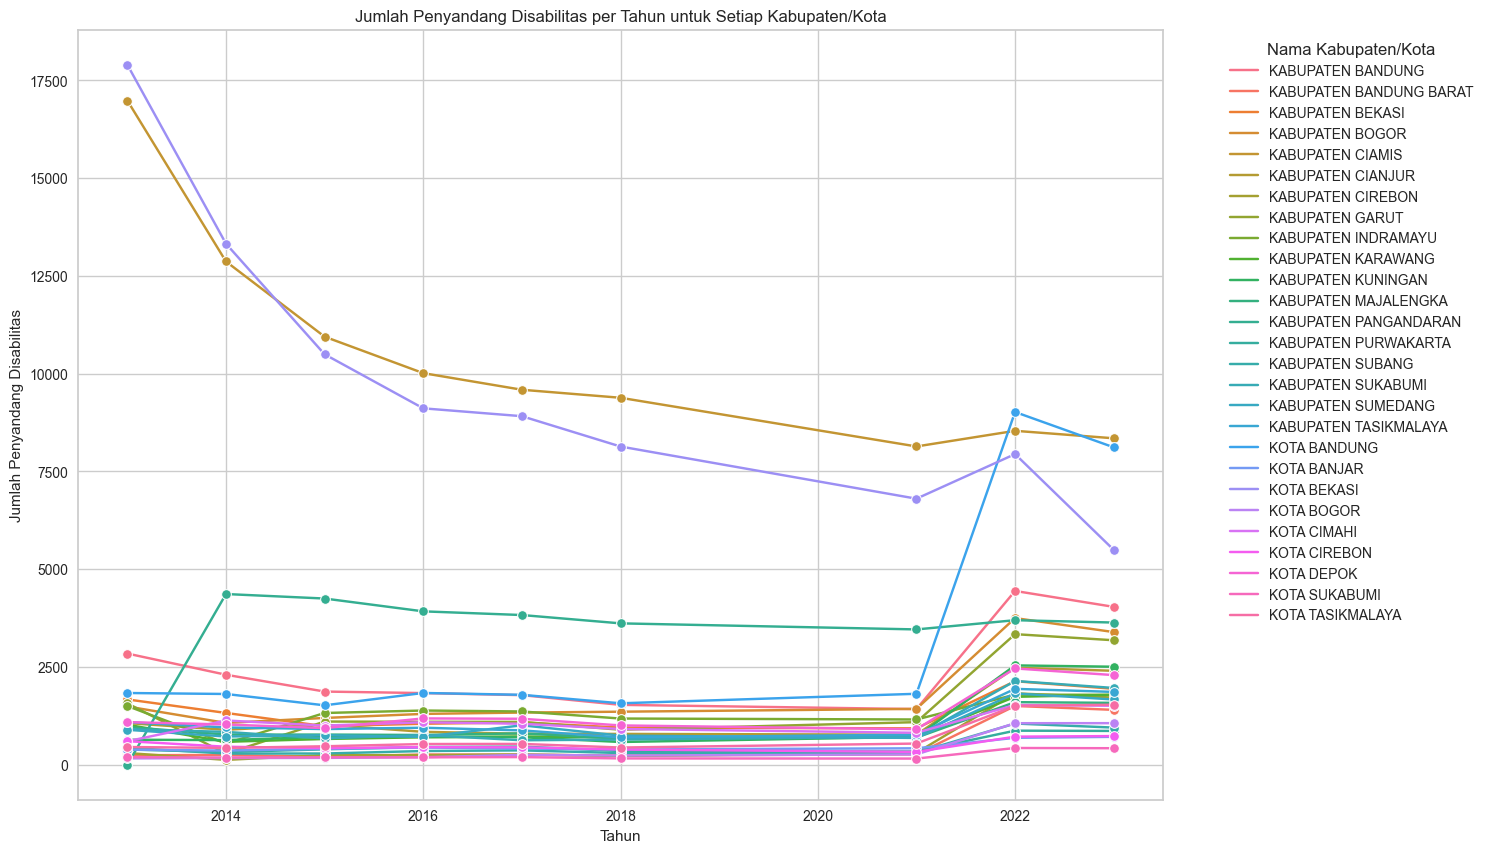

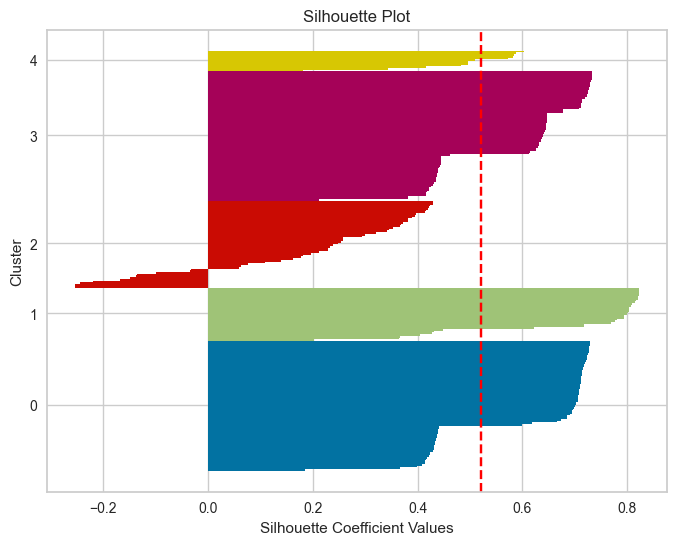

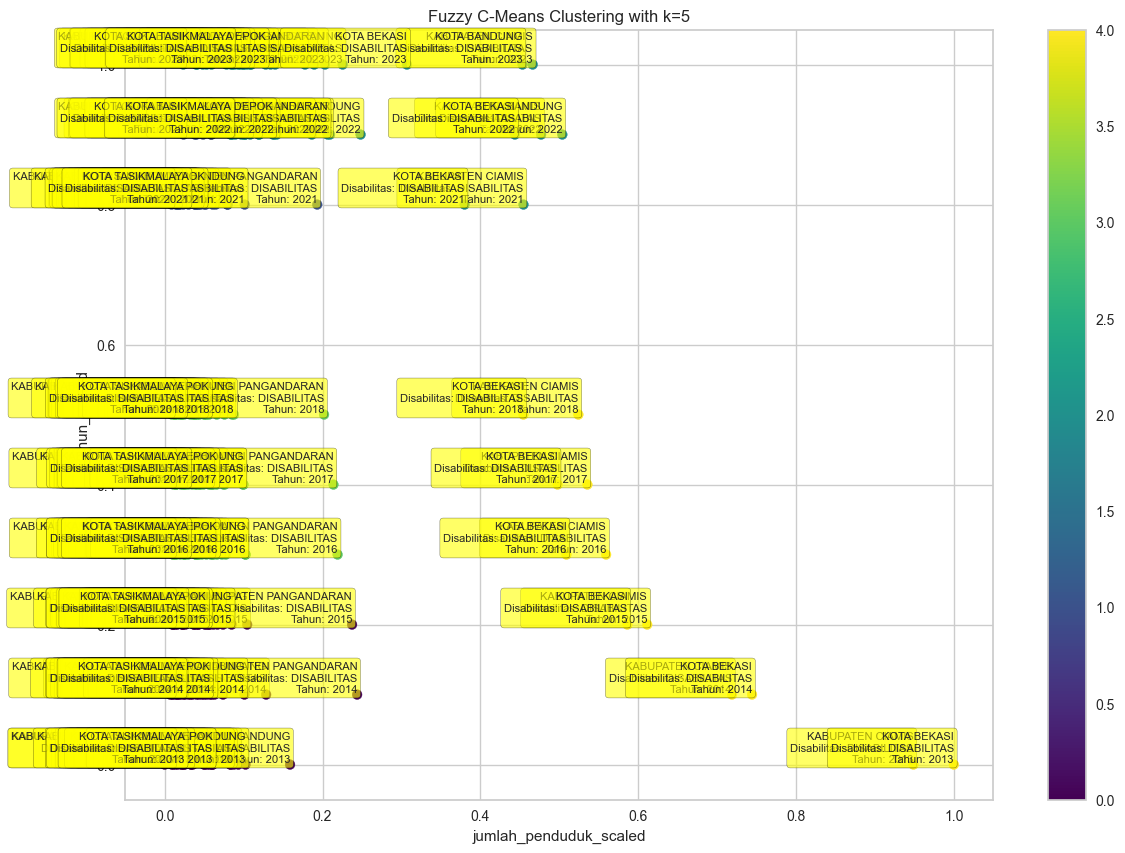

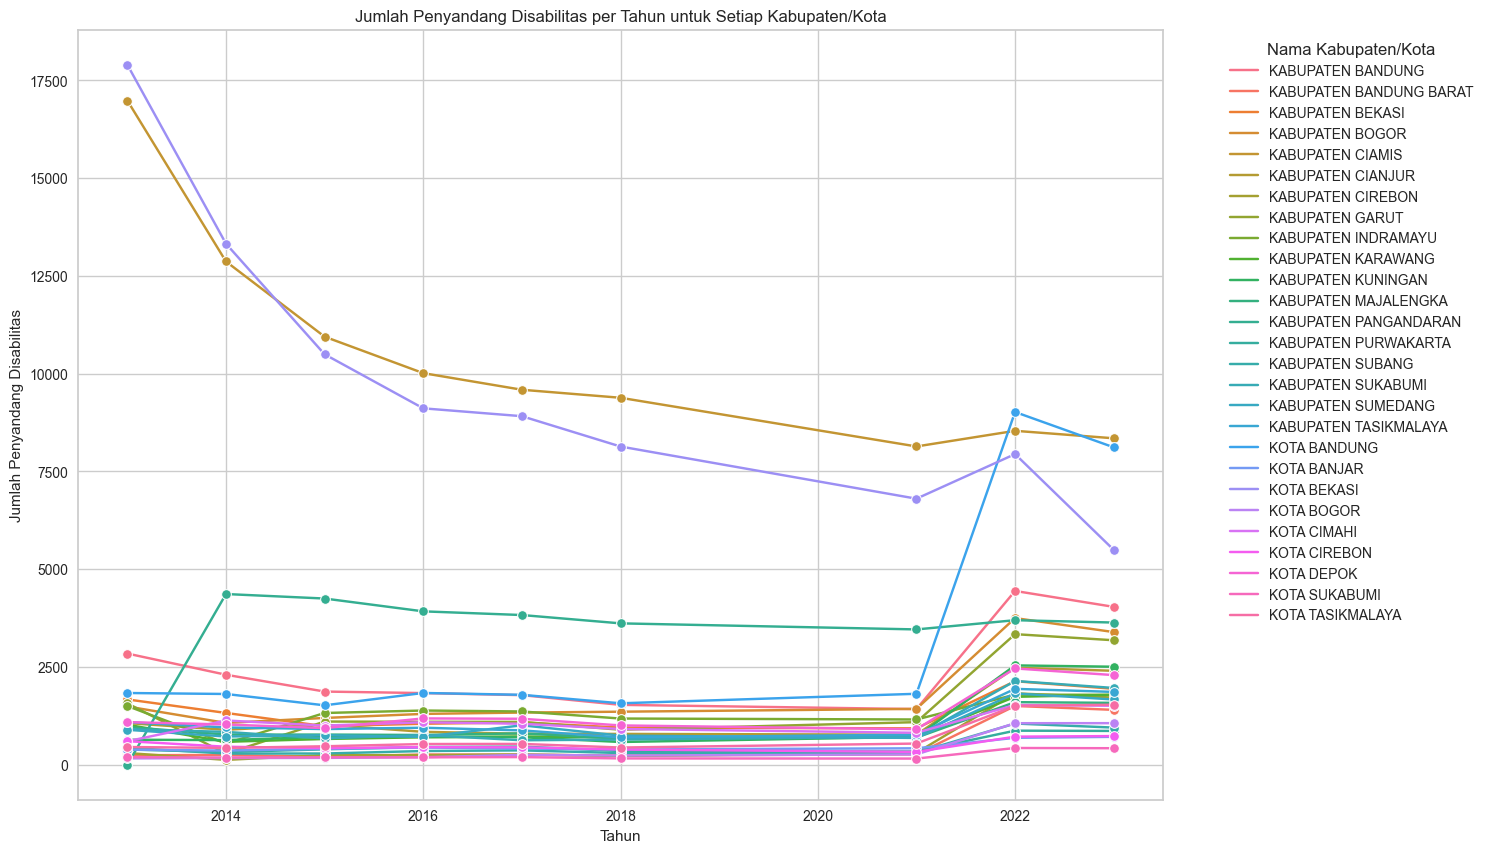

Results have been saved to 'clustering_results.xlsx'


In [148]:
def show_silhouette_plot(algorithm_name, clusterer, data, labels):
    visualizer = SilhouetteVisualizer(clusterer, colors='yellowbrick')
    visualizer.fit(data)
    visualizer.show()

def show_silhouette_plot_no_predict(data, labels):
    silhouette_vals = silhouette_samples(data, labels)
    y_ticks = []
    y_lower, y_upper = 0, 0
    plt.figure(figsize=(8, 6))
    for i in range(len(set(labels))):
        ith_cluster_silhouette_values = silhouette_vals[labels == i]
        ith_cluster_silhouette_values.sort()
        y_upper += len(ith_cluster_silhouette_values)
        plt.barh(range(y_lower, y_upper), ith_cluster_silhouette_values, edgecolor='none', height=1)
        y_ticks.append((y_lower + y_upper) / 2)
        y_lower += len(ith_cluster_silhouette_values)
    plt.axvline(silhouette_vals.mean(), color="red", linestyle="--")
    plt.yticks(y_ticks, range(len(set(labels))))
    plt.xlabel("Silhouette Coefficient Values")
    plt.ylabel("Cluster")
    plt.title("Silhouette Plot")
    plt.show()

def plot_clusters_with_annotations(df, cluster_labels, title):
    plt.figure(figsize=(14, 10))
    scatter = plt.scatter(df['jumlah_penduduk_scaled'], df['tahun_scaled'], c=cluster_labels, cmap='viridis')

    for i, txt in enumerate(df['nama_kabupaten_kota']):
        annotation = f"{txt}\nDisabilitas: {df['kategori_disabilitas'].iloc[i]}\nTahun: {df['tahun'].iloc[i]}"
        plt.annotate(annotation, 
                     (df['jumlah_penduduk_scaled'].iloc[i], df['tahun_scaled'].iloc[i]), 
                     fontsize=8, 
                     ha='right',  # Adjust horizontal alignment
                     va='bottom',  # Adjust vertical alignment
                     bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='yellow', alpha=0.6))

    plt.xlabel('jumlah_penduduk_scaled')
    plt.ylabel('tahun_scaled')
    plt.title(title)
    plt.colorbar(scatter)
    plt.show()

def plot_disabilities_per_year(df):
    plt.figure(figsize=(14, 10))
    sns.lineplot(data=df, x='tahun', y='jumlah_penduduk', hue='nama_kabupaten_kota', marker='o')

    plt.title('Jumlah Penyandang Disabilitas per Tahun untuk Setiap Kabupaten/Kota')
    plt.xlabel('Tahun')
    plt.ylabel('Jumlah Penyandang Disabilitas')
    plt.legend(title='Nama Kabupaten/Kota', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.show()

# Prepare to store results
results = []

# Define range of cluster numbers
cluster_numbers = [2, 3, 4, 5]

# Function to evaluate clustering
def evaluate_clustering(algorithm_name, n_clusters, labels):
    silhouette_avg = silhouette_score(df2[['jumlah_penduduk_scaled', 'tahun_scaled']], labels)
    davies_bouldin = davies_bouldin_score(df2[['jumlah_penduduk_scaled', 'tahun_scaled']], labels)
    results.append({
        'Algorithm': algorithm_name,
        'n_clusters': n_clusters,
        'Silhouette Score': silhouette_avg,
        'Davies-Bouldin Index': davies_bouldin
    })

# Loop over different numbers of clusters
for n_clusters in cluster_numbers:
    # K-Means Clustering
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans_labels = kmeans.fit_predict(df2[['jumlah_penduduk_scaled', 'tahun_scaled']])
    evaluate_clustering('K-Means', n_clusters, kmeans_labels)
    show_silhouette_plot('K-Means', kmeans, df2[['jumlah_penduduk_scaled', 'tahun_scaled']], kmeans_labels)
    plot_clusters_with_annotations(df2, kmeans_labels, f'K-Means Clustering with k={n_clusters}')

    plot_disabilities_per_year(df2)

    # Fuzzy C-Means Clustering
    fcm = FCM(n_clusters=n_clusters)
    fcm.fit(df2[['jumlah_penduduk_scaled', 'tahun_scaled']].to_numpy())
    fcm_labels = fcm.predict(df2[['jumlah_penduduk_scaled', 'tahun_scaled']].to_numpy())
    evaluate_clustering('Fuzzy C-Means', n_clusters, fcm_labels)
    show_silhouette_plot_no_predict(df2[['jumlah_penduduk_scaled', 'tahun_scaled']].to_numpy(), fcm_labels)
    plot_clusters_with_annotations(df2, fcm_labels, f'Fuzzy C-Means Clustering with k={n_clusters}')

    plot_disabilities_per_year(df2)

# Create DataFrame to store the results
results_df = pd.DataFrame(results)

with pd.ExcelWriter('clustering_results.xlsx') as writer:
    # Write the evaluation metrics to a general evaluation sheet
    results_df.to_excel(writer, sheet_name='Evaluation', index=False)

    # Write the metrics for each algorithm in separate sheets
    for algorithm in results_df['Algorithm'].unique():
        algorithm_metrics = results_df[results_df['Algorithm'] == algorithm]
        algorithm_metrics.to_excel(writer, sheet_name=f"{algorithm}_Metrics", index=False)
        

print("Results have been saved to 'clustering_results.xlsx'")